## Solar Energy Projects Dataset - Exploring Linear Regressions

### Contents
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Prepare regression analysis
##### 3.1 Hypothesis to test
#### 4. Testing hypothesis through a regression analysis
###### 4.1 Regression with full dataset
###### 4.2 Regression without outliers
###### 4.3 Regression with non-residential sector

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\ii\OneDrive\02052023Solar Programs NY'

In [4]:
#first uploading the dataset that is already cleaned from previous exercises and includes a new variable - i.e., installation size
df1 = pd.read_pickle(os.path.join(path, '02. Prepared data','solar_power_new.pkl'))

In [5]:
#also uploading the dataset without the outliers, so that it can be used in a regression analysis too
df2 = pd.read_pickle(os.path.join(path, '02. Prepared data','solar_no_outliers.pkl'))

### 2. Data cleaning

In [6]:
df1.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'inverter_quantity',
       'pv_quantity', 'project_cost', 'incentive', 'kw_dc', 'kwh_year',
       'affordable_solar', 'community_distributed_generation', 'location_data',
       'installation_size'],
      dtype='object')

In [7]:
df1.head()

,index,project_number,city,county,state,zip_code,sector,program_type,electric_utility,purchase_type,...,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year,affordable_solar,community_distributed_generation,location_data,installation_size
0,0,5137-49041,Maine,Broome,NY,13802,Residential,Residential/Small Commercial,NYS Electric and Gas,Lease,...,2.0,40.0,41800.00,6930.0,10.00,11738.0,False,False,"Maine, NY 13802\n(42.240938, -76.047937)",Small Solar
1,1,5137-46019,Levittown,Nassau,NY,11756,Residential,Residential/Small Commercial,PSEG Long Island,Lease,...,1.0,28.0,30940.00,2520.0,7.00,8217.0,False,False,"Levittown, NY 11756\n(40.725845, -73.517198)",Small Solar
2,2,5137-52151,Cortland,Cortland,NY,13045,Residential,Residential/Small Commercial,National Grid,Lease,...,2.0,49.0,48387.50,11025.0,12.25,14380.0,False,False,"Cortland, NY 13045\n(42.588691, -76.185061)",Small Solar
3,3,5129-94109,Staten Island,Richmond,NY,10314,Residential,Residential/Small Commercial,Consolidated Edison,Purchase,...,1.0,15.0,23509.54,2943.0,4.91,5758.0,False,False,"Staten Island, NY 10314\n(40.604049, -74.152798)",Small Solar
4,4,5137-46454,Warwick,Orange,NY,10990,Residential,Residential/Small Commercial,Orange and Rockland Utilities,Lease,...,1.0,22.0,25283.00,5720.0,5.72,6714.0,False,False,"Warwick, NY 10990\n(41.263165, -74.365461)",Small Solar


In [8]:
df1.shape

(75564, 22)

This dataframe has more than 5000 entries, so it can work well in a linear regression analysis. 

##### Duplicates check

In [9]:
dups = df1.duplicated()

In [10]:
dups.shape # No dups

(75564,)

##### Extreme values checks

We know from the previous tasks that the data set has extreme values in PV production. Let's check them again

<AxesSubplot:xlabel='kwh_year', ylabel='Density'>

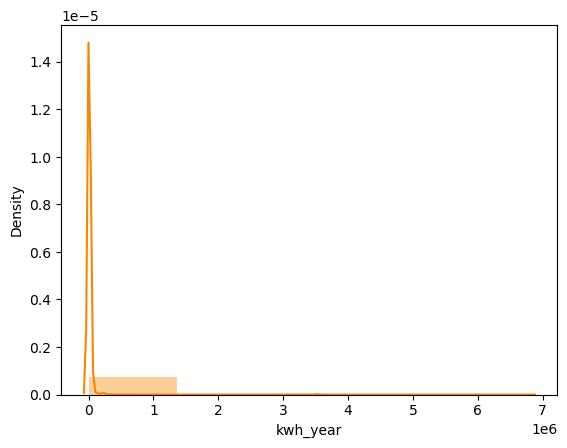

In [11]:
sns.distplot(df1['kwh_year'], color='#fb8500', bins=5) # Shows extreme values

<AxesSubplot:xlabel='kwh_year', ylabel='Density'>

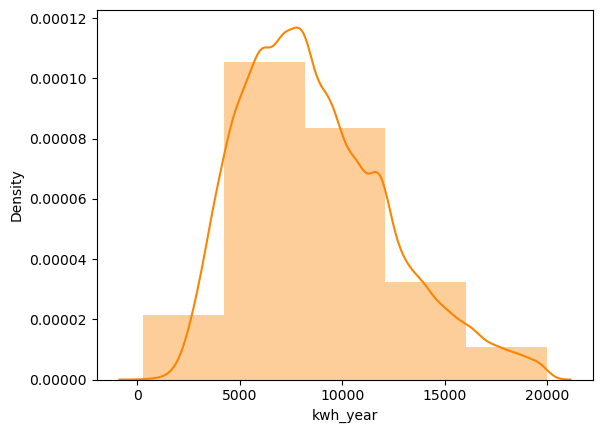

In [12]:
#doing the same analysis using df2, where the larger installations are not included, which shows a more normal distribution
sns.distplot(df2['kwh_year'], color='#fb8500', bins=5) 

In [13]:
df1['kwh_year'].mean() # Check the mean

27323.83185114605

In [14]:
df1['kwh_year'].median() # Check the median

8452.0

In [15]:
df1['kwh_year'].max() # Check the max

6807591.0

The mean, median and max values show the skewedness of the data. There are outliers with very large installations, compared to the majority of PV installation which produces below 100000 KWh_year.

In [16]:
#checking statistics for df2
df2['kwh_year'].mean() # Check the mean

8693.113400028182

In [17]:
df2['kwh_year'].median() # Check the median

8135.0

In [18]:
df2['kwh_year'].max() # Check the max

19967.0

In df2 the values indicate a more average distribuition of the data

In [19]:
df2['kw_dc'].describe ()

count    70970.000000
mean         7.406488
std          3.063254
min          0.250000
25%          5.100000
50%          6.930000
75%          9.320000
max         17.010000
Name: kw_dc, dtype: float64

### 3. Prepare regression analysis

First, I will do a regression with the dataset which includes the outlier values

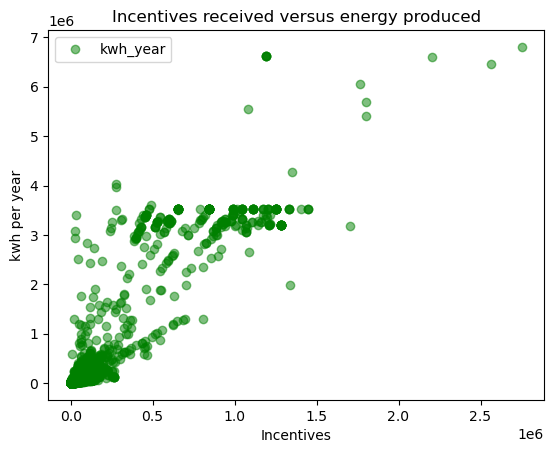

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df1.plot(x = 'incentive', y='kwh_year',style='o',color='green', alpha=0.5) # alpha argument to play with opacity
plt.title('Incentives received versus energy produced')  
plt.xlabel('Incentives')  
plt.ylabel('kwh per year')  
plt.show()

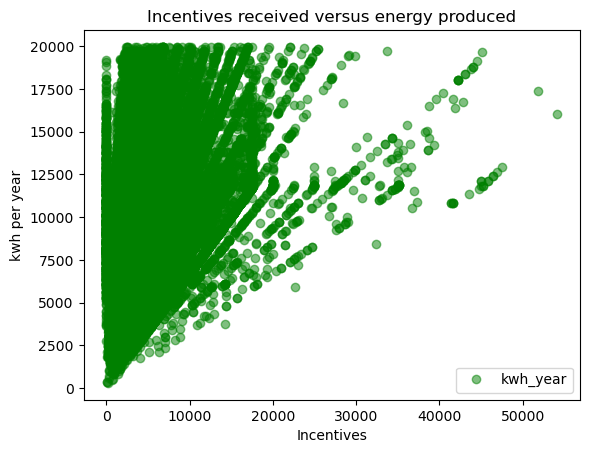

In [21]:
#now checking the same for df2 
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'incentive', y='kwh_year',style='o',color='green',alpha=0.5) 
plt.title('Incentives received versus energy produced')  
plt.xlabel('Incentives')  
plt.ylabel('kwh per year')  
plt.show()

Both the df1 (outliers) and df2 (with no outliers) indicate a linear relantionship between the use of incentives and annual energy production, although there are many data points in both cases that do not follow this linearity

#### 3.1 Hypothesis to test
H1. Incentives have created a boost in PV installations for the commercial and industrial sectors

##### 5.1 Regression with full dataset

#### Regression with full dataset

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['incentive'].values.reshape(-1,1)
y = df1['kwh_year'].values.reshape(-1,1)

In [23]:
X

array([[ 6930.],
       [ 2520.],
       [11025.],
       ...,
       [ 3180.],
       [ 5040.],
       [ 3920.]])

In [24]:
y

array([[11738.],
       [ 8217.],
       [14380.],
       ...,
       [ 9332.],
       [ 6714.],
       [11504.]])

In [25]:
# Split data into a training set and a test set, using 30% of the data for the test and 70% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Create a regression object and predict values

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

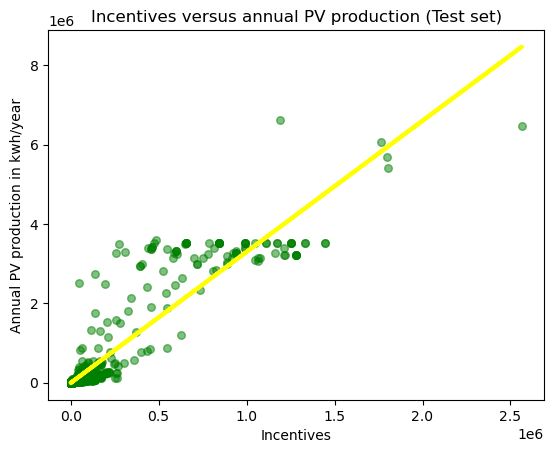

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 30, alpha=0.5) # s to play with the size of the dots
plot_test.plot(X_test, y_predicted, color='yellow', linewidth =3)
plot_test.title('Incentives versus annual PV production (Test set)')
plot_test.xlabel('Incentives')
plot_test.ylabel('Annual PV production in kwh/year')
plot_test.show()

There are several data points at the bottom that are away from the line, so it is important to check statistical measures to learn about the validity of the model

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.30259044]]
Mean squared error:  7092698526.923467
R2 score:  0.8681313029413351


The slope of 3.3 indicates a positive relationship, so the higher the incentive the higher the solar energy produced by year. The root mean squared is quite big, although the dataset is also quite big, this indicates the model is not a very good fit, since the regression line is still away from a significant number of observations (this can be checked too in the scatter plot above). This lack of good fit is likely due to the distribuition of the data. Normal distribuition would make it much more likely to have a good fit in a linear regression, and the data is not normally distributed. Finally, the R2 is quite high - 0.8, which indicates that the dependent variable explains up to 80% of the variance of the data, yet this result is probably biased due to the outlier values.

In [32]:
#checking the predicted values
y_predicted

array([[20063.1222592 ],
       [ 6397.00303915],
       [-2724.75174233],
       ...,
       [ 8157.28374101],
       [28038.87815974],
       [ 4867.90366774]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,9212.0,20063.122259
1,13429.0,6397.003039
2,10377.0,-2724.751742
3,5916.0,19.700909
4,6142.0,-1179.139419
5,13818.0,27635.962127
6,5388.0,8520.568689
7,12132.0,7014.587450
8,10212.0,2212.620958
9,11973.0,16942.174298


These results confirm the lack of fitness of the model, despite the high R2. The high level of skewdness in the data, indicates there is a data bias due to a high number of outlier values. 

##### Compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.30259044]]
Mean squared error:  7255113441.9939995
R2 score:  0.8492522607419478


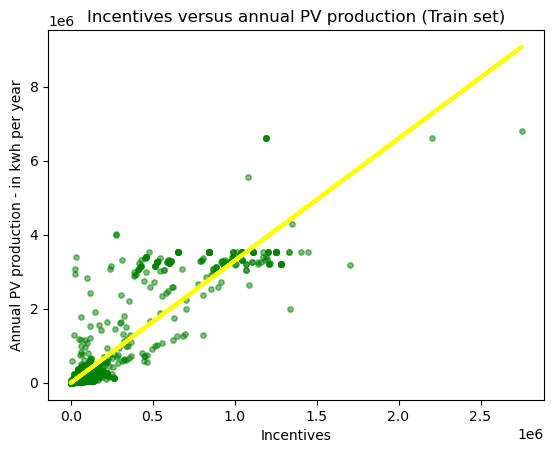

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15, alpha=0.5)
plot_test.plot(X_train, y_predicted_train, color='yellow', linewidth =3)
plot_test.title('Incentives versus annual PV production (Train set)')
plot_test.xlabel('Incentives')
plot_test.ylabel('Annual PV production - in kwh per year')
plot_test.show()

We have a similar result here with a positive slope, and high and significant R2 value but a low fitness of the model to the data's distribution. 

##### 5.2 Regression without outliers

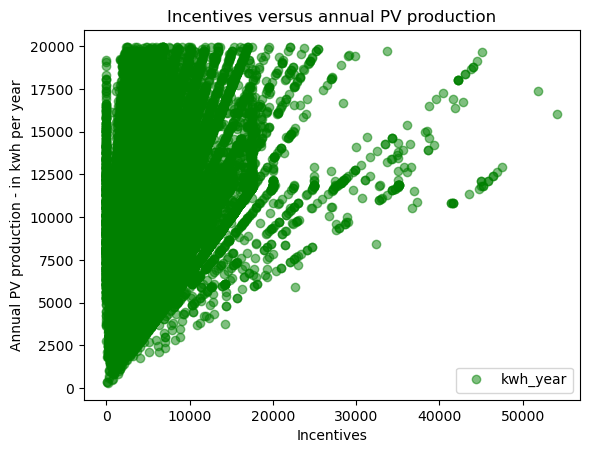

In [38]:
# See how the scatterplot looks without outliers.

df2.plot(x = 'incentive', y='kwh_year', style='o', color='green', alpha=0.5)  
plt.title('Incentives versus annual PV production')  
plt.xlabel('Incentives')  
plt.ylabel('Annual PV production - in kwh per year')  
plt.show()

In [39]:
# Reshape again.

X_2 = df2 ['incentive'].values.reshape(-1,1)
y_2 = df2 ['kwh_year'].values.reshape(-1,1)

In [40]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [41]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [42]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [43]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.40258483]]
Mean squared error:  10721490.845866079
R2 score:  0.18341886653222406


The statistics show a lower positive slope, and a high MSE which indicates the model isn't a good fit either. In addition, the low R2 confirms that the outliers values were creating bias in the model.

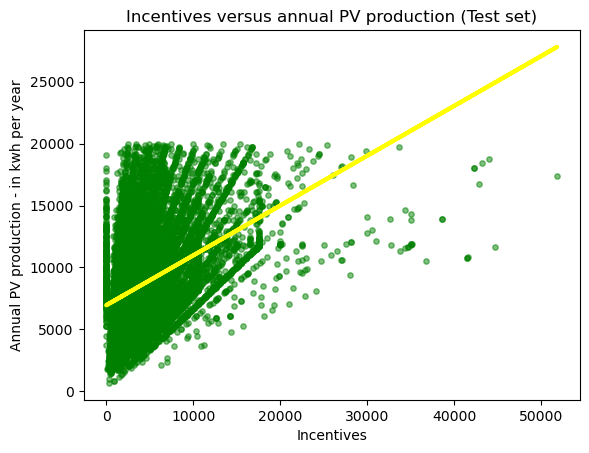

In [45]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='green', s = 15 ,alpha=0.5)
plot_test.plot(X_test_2, y_predicted_2, color='yellow', linewidth =3)
plot_test.title('Incentives versus annual PV production (Test set)')
plot_test.xlabel('Incentives')
plot_test.ylabel('Annual PV production - in kwh per year')
plot_test.show()

In [46]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,5494.0,7197.924724
1,14526.0,9440.322205
2,8546.0,7535.290808
3,3592.0,8153.049172
4,6750.0,8060.261422
5,5987.0,8468.482435
6,16786.0,7732.154788
7,16058.0,8050.599386
8,4026.0,8329.993255
9,15266.0,9000.409714


Without the outliers the model performs a bit better, but it is still not a good fit

In [89]:
#Repeating the regression now looking at project_cost
# Reshape again.
# Reshape again.

X_3 = df2 ['project_cost'].values.reshape(-1,1)
y_3 = df2 ['kwh_year'].values.reshape(-1,1)

In [90]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [91]:
regression = LinearRegression()  
regression.fit(X_train_3, y_train_3)

LinearRegression()

In [92]:
y_predicted_3 = regression.predict(X_test_3)

In [93]:
rmse = mean_squared_error(y_test_3, y_predicted_3)
r2 = r2_score(y_test_3, y_predicted_3)

In [94]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.1882477]]
Mean squared error:  4319199.241352676
R2 score:  0.6710367370656447


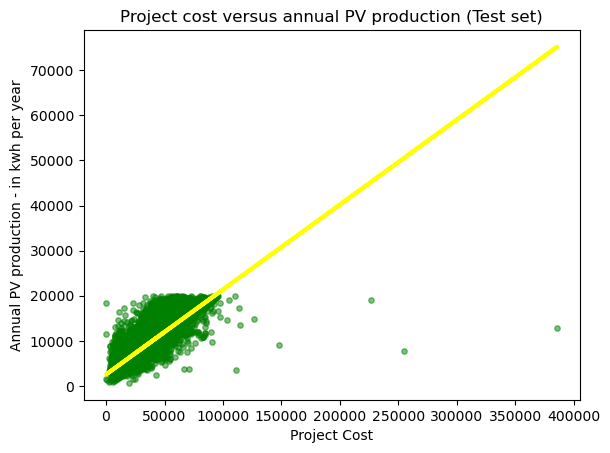

In [95]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_3, y_test_3, color='green', s = 15 ,alpha=0.5)
plot_test.plot(X_test_3, y_predicted_3, color='yellow', linewidth =3)
plot_test.title('Project cost versus annual PV production (Test set)')
plot_test.xlabel('Project Cost')
plot_test.ylabel('Annual PV production - in kwh per year')
plot_test.show()

In [97]:
data = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data.head(10)

,Actual,Predicted
0,5494.0,7490.593420
1,14526.0,9545.693513
2,8546.0,10258.888733
3,3592.0,5581.197043
4,6750.0,8618.573612
5,5987.0,7357.314051
6,16786.0,17631.873278
7,16058.0,15121.537548
8,4026.0,5598.195810
9,15266.0,16560.367395


##### 5.3 Regression with non-residential sector

In [47]:
#create a sub-set of the data for non-residential sector
df3= df1[df1['program_type']=='Commercial/Industrial (MW Block)']

In [48]:
df3.shape

(440, 22)

In [49]:
df3.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'inverter_quantity',
       'pv_quantity', 'project_cost', 'incentive', 'kw_dc', 'kwh_year',
       'affordable_solar', 'community_distributed_generation', 'location_data',
       'installation_size'],
      dtype='object')

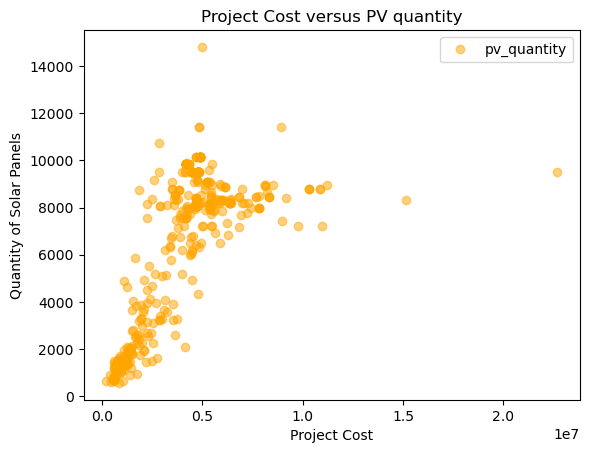

In [79]:
#repeat analysis with df3
# See how the scatterplot looks without outliers, now using pv quantity has the dependent variable

df3.plot(x = 'project_cost', y='pv_quantity', style='o', color='orange', alpha=0.5)  
plt.title('Project Cost versus PV quantity')  
plt.xlabel('Project Cost')  
plt.ylabel('Quantity of Solar Panels')  
plt.show()

In [98]:
# Reshape again.

X_4 = df3 ['project_cost'].values.reshape(-1,1)
y_4 = df3 ['kwh_year'].values.reshape(-1,1)

In [99]:
#creating a new training and test data
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

In [100]:
regression = LinearRegression()  
regression.fit(X_train_4, y_train_4)

LinearRegression()

In [101]:
# Predict.

y_predicted_4 = regression.predict(X_test_4)

In [102]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test_4, y_predicted_4)
r2 = r2_score(y_test_4, y_predicted_4)

In [103]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.44337996]]
Mean squared error:  571430073113.6399
R2 score:  0.640354606108614


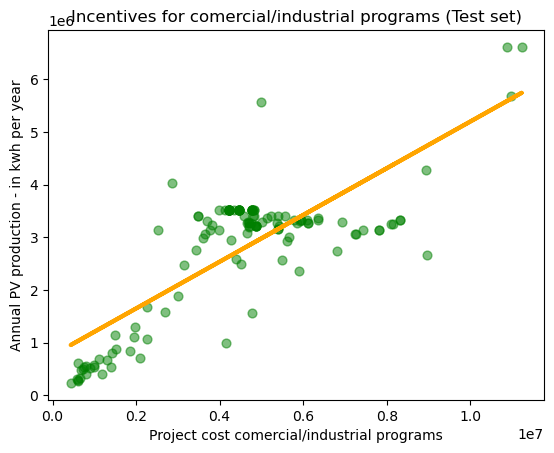

In [106]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_4, y_test_4, color='green', s = 40 ,alpha=0.5)
plot_test.plot(X_test_4, y_predicted_4, color='orange', linewidth =3)
plot_test.title('Incentives for comercial/industrial programs (Test set)')
plot_test.xlabel('Project cost comercial/industrial programs')
plot_test.ylabel('Annual PV production - in kwh per year')
plot_test.show()

In [105]:
data = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_predicted_4.flatten()})
data.head(10)

,Actual,Predicted
0,3261914.0,4.373433e+06
1,3368921.0,3.577344e+06
2,3407669.0,2.306839e+06
3,3405451.0,2.798019e+06
4,3521221.0,2.905773e+06
5,6611302.0,5.742402e+06
6,3521497.0,2.632368e+06
7,3136500.0,2.434975e+06
8,3521221.0,2.879170e+06
9,3160916.0,3.151478e+06


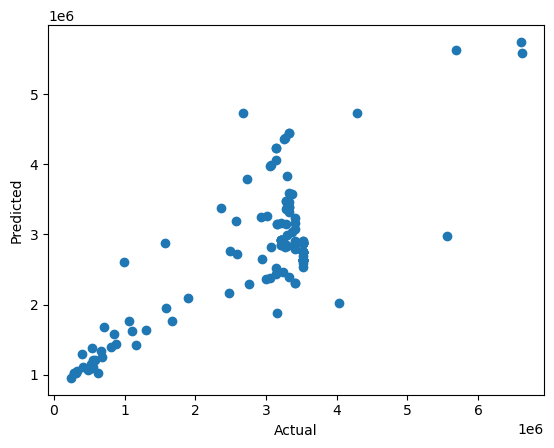

In [107]:
#Visualizing the difference between the predicted and the actual values
plt.scatter(y_test_4,y_predicted_4);
plt.xlabel('Actual');
plt.ylabel('Predicted');

When focussing only on commercial program types, the model is even less of fit, but also the dataset is quite small (i.e., 440 entries), which is not enough data for a regression model. Neverthless, the R2 indicates a moderate relationship, as the model would explain 49% of the data.  

We can conclude that incentive policies have helped boosting solar installations, but their impact has not been significant, other factors have contributed to the implemementation of these projects. In addition, as project costs increased, so does production. 